# Overlap Graphs - Rosalind

### Teoria de grafos  

From [Wikipedia](https://pt.wikipedia.org/wiki/Teoria_dos_grafos).  
A teoria dos grafos ou de grafos é um ramo da matemática que estuda as relações entre os objetos de um determinado conjunto. Para tal são utilizadas estruturas chamadas de grafos, $G ( V , E )$, onde $V$  é um conjunto não vazio de objetos denominados vértices (ou nós) e $E$  (do inglês edges - arestas) é um subconjunto de pares não ordenados de $V$.

Dependendo da aplicação, arestas podem ou não ter direção, pode ser permitido ou não arestas ligarem um vértice a ele próprio e vértices e/ou arestas podem ter um peso (numérico) associado. Se as arestas têm um sentido associado (indicado por uma seta na representação gráfica) temos um dígrafo (grafo orientado). Um grafo com um único vértice e sem arestas é conhecido como grafo trivial.

Estruturas que podem ser representadas por grafos estão em toda parte e muitos problemas de interesse prático podem ser formulados como questões sobre certos grafos. Por exemplo, a estrutura de ligações da Wikipédia pode ser representada por um dígrafo: os vértices são os artigos da Wikipédia e existe uma aresta do artigo A para o artigo B se e somente se A contém um link para B. Dígrafos são também usados para representar máquinas de estado finito. O desenvolvimento de algoritmos para manipular grafos é um tema importante da ciência da computação. 



[Aqui tem um paper](https://www.nature.com/articles/nbt.2023) que mostra como aplicar grafos de Brujin para montagens de genomas e [aqui um outro](https://www.nature.com/articles/s41592-020-01056-5) sobre como resolver diferentes haplotipos na montagem com a mesma ferramenta.  


***   


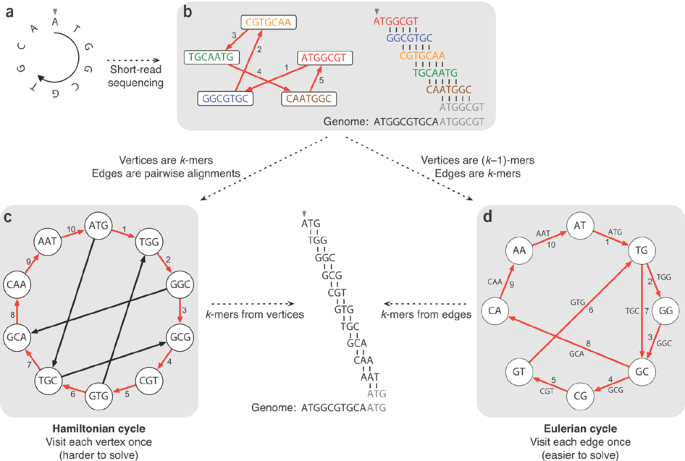  



***  


**(a)** An example small circular genome. **(b)** In traditional Sanger sequencing algorithms, reads were represented as nodes in a graph, and edges represented alignments between reads. Walking along a Hamiltonian cycle by following the edges in numerical order allows one to reconstruct the circular genome by combining alignments between successive reads. At the end of the cycle, the sequence wraps around to the start of the genome. The repeated part of the sequence is grayed out in the alignment diagram. **(c)** An alternative assembly technique first splits reads into all possible k-mers: with k = 3, ATGGCGT comprises ATG, TGG, GGC, GCG and CGT. Following a Hamiltonian cycle (indicated by red edges) allows one to reconstruct the genome by forming an alignment in which each successive k-mer (from successive nodes) is shifted by one position. This procedure recovers the genome but does not scale well to large graphs. **(d)** Modern short-read assembly algorithms construct a de Bruijn graph by representing all k-mer prefixes and suffixes as nodes and then drawing edges that represent k-mers having a particular prefix and suffix. For example, the k-mer edge ATG has prefix AT and suffix TG. Finding an Eulerian cycle allows one to reconstruct the genome by forming an alignment in which each successive k-mer (from successive edges) is shifted by one position. This generates the same cyclic genome sequence without performing the computationally expensive task of finding a Hamiltonian cycle.

Agora, vamos resolver o problema ;)

In [23]:
# Usamos 'open' com a opção 'r' para ler
f = open("rosalind_grph.txt","r") 

## Que é um k-mer?
 
From [Wikipedia](https://en.wikipedia.org/wiki/K-mer).

In bioinformatics, k-mers are substrings of length k {\displaystyle k} k contained within a biological sequence. Primarily used within the context of computational genomics and sequence analysis, in which k-mers are composed of nucleotides (i.e. A, T, G, and C), k-mers are capitalized upon to assemble DNA sequences,[1] improve heterologous gene expression,[2][3] identify species in metagenomic samples,[4] and create attenuated vaccines.[5] Usually, the term k-mer refers to all of a sequence's subsequences of length $k$, such that the sequence AGAT would have four monomers (A, G, A, and T), three 2-mers (AG, GA, AT), two 3-mers (AGA and GAT) and one 4-mer (AGAT). More generally, a sequence of length $L$ will have $L − k + 1$  k-mers and $n k$ total possible k-mers, where $n$ is number of possible monomers (e.g. four in the case of DNA). 

In [24]:
# Seleciono o tamanho da minha sub-string, tamanho de sobreposição ou k-mer
k = 3

## Método *readlines*  

The `readlines()` method returns a list containing each line in the file as a list item.

Use the hint parameter to limit the number of lines returned. If the total number of bytes returned exceeds the specified number, no more lines are returned.  

**Syntax**   
`
file.readlines(hint)  
` 


**Parameter Values**   



|Parameter |	Description|
|----------|---------------|
|hint |	Optional. If the number of bytes returned exceed the hint number, no more lines will be returned. Default value is  -1, which means all lines will be returned.|

In [26]:
# Como o file é um multifasta, separo as linhas com readlines, que separa na quebra de linhas
lines = f.readlines()

#Crio uma lista vazia para os IDs e uma para as sequencias
ID = []
seq = []

# Reforma para ajustar os dados de entrada aos que queremos de saída:
def reform(lines):                             # definimos a função
    for line in lines:
        if line.startswith(">"):               # loop para detectar fasta heads
            a = line.replace(">", "")          # elimino o simbolo ">"
            a = a.replace("\n", "")            # e elimino a quebra de linha
            ID.append(a)                       # finalmente, armazeno ela na lista de IDs
        else:
            if len(ID) > len(seq):
                line = line.replace("\n","")   # elimino a quebra de linha
                seq.append(line)               # crio uma 'lista' com todas as seqs, uma por linha
                #print(line)                   # soh testando
            else:
                line = line.replace("\n", "")
                seq[len(ID) - 1] = seq[len(ID) - 1] + line
    return ID , seq
ID, seq = reform(lines)


# Crio duas listas vazias 
s = []
t = []

for i in range(len(ID)):
    for j in range(len(seq)):

        if i != j:
            if seq[i][-k:] == seq[j][:k]: # comparo a igualdade o k-mer final de i vs o k-mer inicial de j
                # guardo os pares nas listas
                s.append(ID[i]) 
                t.append(ID[j])
                
# printo as listas como pares
for i in range(len(s)):
    print(s[i] + " " + t[i]) 
    

f.close()

## Saving the output in a file   

Eu me toquei depois, mas o file é ENORME, eu copiei e colei o resultado, mas deveria ter salvado em um arquivo, como estou (tentando) fazendo aqui, rs.  


### O módulo *sys*   


The sys module in Python provides various functions and variables that are used to manipulate different parts of the Python runtime environment. It allows operating on the interpreter as it provides access to the variables and functions that interact strongly with the interpreter.   


**Input and Output using sys**

The sys modules provide variables for better control over input or output. We can even redirect the input and output to other devices. This can be done using three variables – 

 

   * stdin
   * stdout
   * stderr

**stdin:** It can be used to get input from the command line directly. It is used for standard input. It internally calls the input() method. It, also, automatically adds ‘\n’ after each sentence.

```
import sys 
  
  
for line in sys.stdin: 
    if 'q' == line.rstrip(): 
        break
    print(f'Input : {line}') 
  
print("Exit") 
```


**stdout:** A built-in file object that is analogous to the interpreter’s standard output stream in Python. stdout is used to display output directly to the screen console. Output can be of any form, it can be output from a print statement, an expression statement, and even a prompt direct for input. By default, streams are in text mode. In fact, wherever a print function is called within the code, it is first written to sys.stdout and then finally on to the screen. 

```
import sys
  
  
sys.stdout.write('Geeks')   
```

**stderr:** Whenever an exception occurs in Python it is written to sys.stderr. 


 
```
import sys 
  
  
def print_to_stderr(*a): 
  
    # Here a is the array holding the objects 
    # passed as the argument of the function 
    print(*a, file = sys.stderr) 
  
print_to_stderr("Hello World") 
```

In [20]:
import sys
    sys.stdout = open('/home/nat/Documents/GitHub/Rosalind/rosalind_grph_out.txt', "w")
